In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats
from scipy.stats import *
import sympy as smp
import scipy as sp
from scipy.integrate import quad
from scipy.special import erf
from scipy.special import iv
from scipy.special import ndtri

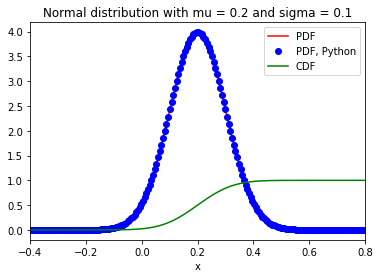

In [6]:
#Plot and sample the normal distribution

#Define the parameters 
mu=0.2 #mean 
sigma=0.1 #standard deviation
a=-0.4 #left truncation
b=0.8 #right truncation
ngrid=200 #number of grid intervals
nsample=np.power(10,6) #number of random samples

#Define the grid with linspace
nbins=100 #refers to number of historical bins
x=np.linspace(a,b,ngrid)
deltax=x[1]-x[0]

#Compute and plot the PDF and CDF
f1 = (1/(np.sqrt(2*np.pi)*sigma)) * np.exp((-1/2)*((x-mu)/sigma)**2)
pdf=norm.pdf(x,mu,sigma)
cdf=norm.cdf(x,mu,sigma)
F1=(erf((x-mu)/(sigma*np.sqrt(2)))+1)*0.5
#alternartively look at a1q1!
#F1=f1.cumsum())*deltax or you can do this for cdf assuming ngrid=nbins is large and deltax=b-a/ngrid

plt.figure(1) 
plt.plot(x,f1,'r',x,pdf,'bo',x,cdf,'g')
plt.xlim((a,b)) #limits of the x-axis
plt.xlabel('x') #label of x-axis
plt.legend(['PDF','PDF, Python','CDF'])
plt.title('Normal distribution with mu = 0.2 and sigma = 0.1')
plt.show()

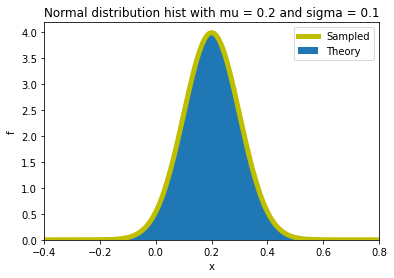

In [89]:
#Sample the normal distribution
U = np.random.rand(nsample,1) #method 1: start from standard uniform random numnbers
#X= mu+sigma*ndtri(U) method 1: scale and shift, ndtri replicates norminv
X=mu+sigma*np.random.randn(nsample,1) #method 2

#See color codes
#https://matplotlib.org/stable/tutorials/colors/colors.html

plt.figure(2)
plt.hist(X,bins=nbins,density=True)
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),'y',lw=5)
plt.xlim((a,b))
plt.xlabel('x')
plt.ylabel('f')
plt.title('Normal distribution hist with mu = 0.2 and sigma = 0.1') 
plt.legend(['Sampled','Theory'])
plt.show()

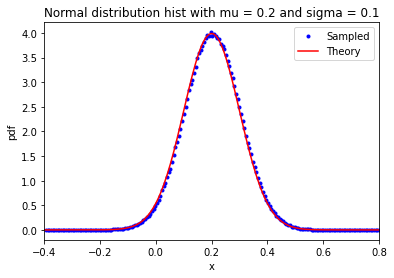

In [29]:
h=np.histogram(X,x)[0]/(nsample*deltax)
plt.figure(3)
plt.plot(x[1:],h,'b.',x,pdf,'r')
plt.xlim((a,b))
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend(['Sampled','Theory'])
plt.title('Normal distribution hist with mu = 0.2 and sigma = 0.1') 
plt.show()

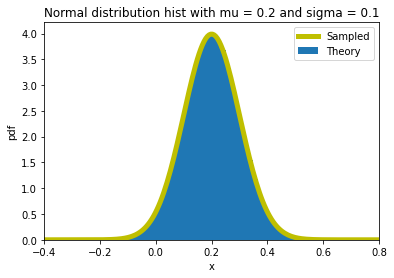

In [88]:
plt.figure(4)
plt.bar(x[1:],h,width=0.01)
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),'y',lw=5)
plt.xlim((a,b))
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend(['Sampled','Theory'])
plt.title('Normal distribution hist with mu = 0.2 and sigma = 0.1') 
plt.show()

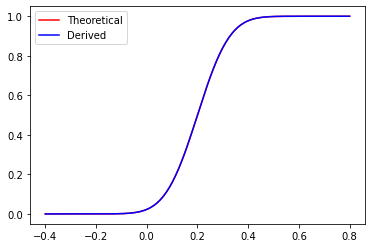

In [11]:
#Exercise in class, derive cdf formula using erf analytically:
plt.figure(5)
plt.plot(x,cdf,'r',x,F1,'b')
plt.legend(['Theoretical','Derived'])
plt.show()